In [37]:
import pandas as pd
import numpy as np


In [38]:
books = pd.read_csv('books.csv')
books_new = pd.read_csv('books_new.csv')

In [39]:
books.shape

(211, 5)

In [40]:
books_new.shape

(211, 6)

In [41]:
books.head()

,Title,Author,Genre,Height,Publisher
0,Fundamentals of Wavelets,"Goswami, Jaideva",signal_processing,228,Wiley
1,Data Smart,"Foreman, John",data_science,235,Wiley
2,God Created the Integers,"Hawking, Stephen",mathematics,197,Penguin
3,Superfreakonomics,"Dubner, Stephen",economics,179,HarperCollins
4,Orientalism,"Said, Edward",history,197,Penguin


In [42]:
books_new

,Title,Author,Genre,SubGenre,Height,Publisher
0,Fundamentals of Wavelets,"Goswami, Jaideva",tech,signal_processing,228,Wiley
1,Data Smart,"Foreman, John",tech,data_science,235,Wiley
2,God Created the Integers,"Hawking, Stephen",tech,mathematics,197,Penguin
3,Superfreakonomics,"Dubner, Stephen",science,economics,179,HarperCollins
4,Orientalism,"Said, Edward",nonfiction,history,197,Penguin
...,...,...,...,...,...,...
206,Structure and Randomness,"Tao, Terence",science,mathematics,252,NaN
207,Image Processing with MATLAB,"Eddins, Steve",tech,signal_processing,241,NaN
208,Animal Farm,"Orwell, George",fiction,classic,180,NaN
209,"Idiot, The","Dostoevsky, Fyodor",fiction,classic,197,NaN


In [43]:
books.isnull().sum()

Title         0
Author       24
Genre         0
Height        0
Publisher    96
dtype: int64

In [44]:
books_new.isnull().sum()

Title         0
Author       24
Genre         0
SubGenre      0
Height        0
Publisher    96
dtype: int64

In [45]:
books.duplicated().sum()

0

In [46]:
books_new.duplicated().sum()

0

In [47]:
import matplotlib.pyplot as plt

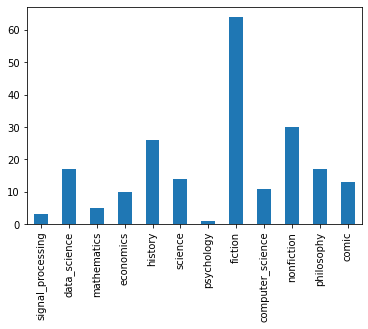

In [48]:
books['Genre'].value_counts(sort=False).plot(kind='bar')
plt.show()

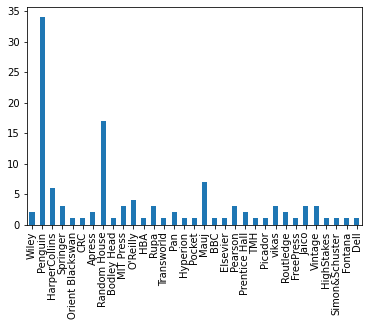

In [49]:
books['Publisher'].value_counts(sort=False).plot(kind='bar')
plt.show()

In [50]:
print(list(books.columns))

['Title', 'Author', 'Genre', 'Height', 'Publisher']


In [51]:
print(list(books_new.columns))

['Title', 'Author', 'Genre', 'SubGenre', 'Height', 'Publisher']


In [52]:
data = books_new[['Title','SubGenre']]

In [53]:
merge_books = books.merge(data,on='Title')
merge_books.shape

(213, 6)

In [54]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=500,stop_words='english')

In [55]:
vectors = cv.fit_transform(merge_books['Genre']).toarray()

In [56]:
vectors

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [57]:
# we have to fine cosine distance

from sklearn.metrics.pairwise import cosine_similarity

In [58]:
similarity_scores = cosine_similarity(vectors)

In [59]:
similarity_scores.shape

(213, 213)

In [60]:
merge_books

,Title,Author,Genre,Height,Publisher,SubGenre
0,Fundamentals of Wavelets,"Goswami, Jaideva",signal_processing,228,Wiley,signal_processing
1,Data Smart,"Foreman, John",data_science,235,Wiley,data_science
2,God Created the Integers,"Hawking, Stephen",mathematics,197,Penguin,mathematics
3,Superfreakonomics,"Dubner, Stephen",economics,179,HarperCollins,economics
4,Orientalism,"Said, Edward",history,197,Penguin,history
...,...,...,...,...,...,...
208,Structure and Randomness,"Tao, Terence",mathematics,252,NaN,mathematics
209,Image Processing with MATLAB,"Eddins, Steve",signal_processing,241,NaN,signal_processing
210,Animal Farm,"Orwell, George",fiction,180,NaN,classic
211,"Idiot, The","Dostoevsky, Fyodor",fiction,197,NaN,classic


In [61]:
def recommend(book_name):
    index  = merge_books[merge_books['Title']== book_name].index[0]
    distances = sorted(list(enumerate(similarity_scores[index])),reverse=True,key=lambda x: x[1])
    for i in distances[1:5]:
        print(merge_books.iloc[i[0]][['Title','Genre']])
        

In [70]:
def recommend(book_name):
    index  = merge_books[merge_books['Title']== book_name].index[0]
    distances = sorted(list(enumerate(similarity_scores[index])),reverse=True,key=lambda x: x[1])
    #print(distances)
    for i in distances[1:5]:
        data = merge_books.iloc[i[0]][['Title','Genre']]
        movie_names = movie_names.append(books.iloc[i[0]].Title)
        print(movie_names)
        

In [101]:
def recommend(user_input):
    #user_input = request.form.get('user_input')
    index = merge_books[merge_books['Title'] == user_input].index[0]
    distances = sorted(list(enumerate(similarity_scores[index])), reverse=True, key=lambda x: x[1])
    books_names = []
    for i in distances[1:5]:
        data = books.iloc[i[0]][['Title', 'Genre']]

        books_names = books.iloc[i[0]].Title

    print(data)

    #return render_template('recommend.html', data=data)

In [102]:
recommend('Data Smart')

Title    Data Mining Handbook
Genre            data_science
Name: 17, dtype: object


In [ ]:
recommend('Complete Sherlock Holmes, The - Vol I')

In [ ]:
import pickle
pickle.dump(merge_books,open('books.pkl',"wb"))
pickle.dump(similarity_scores,open('similarity_scores.pkl','wb'))